In [2]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans

import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
sys.path.append('../utils')
import operator_calculations as op_calc
import stats
plt.rc('text', usetex=True)
plt.rc('font',size=14)

In [3]:
#change path to where 'manuscript_data' is saved
dir_path = '/Users/costa/Repositories/max_pred_states_repo+data/manuscript_data/'

In [4]:
f = h5py.File(dir_path+'Lorenz/simulation/simulation.h5','r')
sim = np.array(f['simulation'])
T = np.array(f['MetaData/T'])[0]
discard_t = np.array(f['MetaData/discarded_t'])[0]
dt = np.array(f['MetaData/integration_step'])[0]
f.close()

# top panel

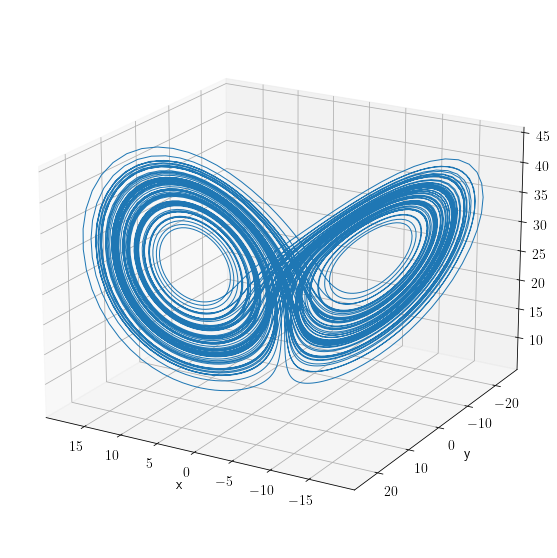

In [6]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.view_init(20, 120)
x = sim[:10000,0]
y = sim[:10000,1]
z = sim[:10000,2]
ax.plot3D(x, y, z,lw=1)
plt.xlabel('x')
plt.ylabel('y')
# plt.axis('off')
# plt.savefig('Lorenz_3d_axis.pdf')
plt.show()

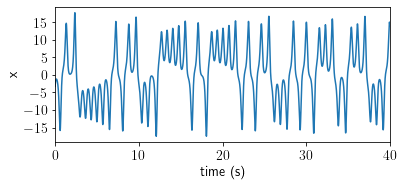

In [9]:
plt.figure(figsize=(6,2.5))
plt.plot(np.arange(0,4000*dt,dt),sim[:4000,0])
plt.xlim(0,40)
plt.yticks(np.arange(-15,16,5))
plt.xlabel('time (s)')
plt.ylabel('x')
plt.show()

# middle panel

In [15]:
f = h5py.File('/Users/costa/Repositories/manuscript_data/Lorenz/combined_embedding_results.h5','r')
K_max=-1
K_range = np.array(f['K_range'])[:K_max]
seed_range = np.array(f['seed_range'],dtype=int)
length = np.array(f['length'])
prob_K_s = np.array(f['probs'])[:K_max,:]
H_K_s = np.array(f['entropies'])[:K_max,:]
h_K_s = np.array(f['entropy_rates'])[:K_max,:]/dt
Ipred_K_s = np.array(f['Ipreds'])[:K_max,:]
eps_K_s = np.array(f['eps_scale'])[:K_max,:]
f.close()

f = h5py.File('/Users/costa/Repositories/manuscript_data/Lorenz/combined_source_entropy_results.h5','r')
h_source = np.array(f['entropy_rates'])/dt
f.close()

mean_source = np.mean(h_source[:-1],axis=1)
cil_source = np.percentile(h_source[:-1],2.5,axis=1)
ciu_source = np.percentile(h_source[:-1],97.5,axis=1)

In [16]:
colors_K = plt.cm.viridis(np.linspace(0,1,len(K_range)))

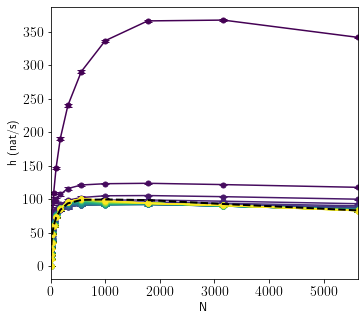

In [17]:
h_Sprott = 0.90563
plt.figure(figsize=(5.5,5))
for k,K in enumerate(K_range):
    mean = np.mean(h_K_s[k,:-1,:].T,axis=0)
    cil = np.percentile(h_K_s[k,:-1,:].T,2.5,axis=0)
    ciu = np.percentile(h_K_s[k,:-1,:].T,97.5,axis=0)
    plt.errorbar(seed_range[:-1],mean,c=colors_K[k],yerr = [mean-cil,ciu-mean],capsize=4,marker='o',ms=5)
plt.xlim(0,seed_range[-2])
# plt.ylim(0,3.8)
plt.xlabel('N',fontsize=12)
plt.errorbar(seed_range[:-1],mean_source,c='k',yerr = [mean_source-cil_source,ciu_source-mean_source],capsize=4,lw=2,ls='--')
# plt.axhline(h_Sprott,c='k',ls='--',lw=3)
plt.ylabel('h (nat/s)',fontsize=12)
# plt.savefig('h_N_Lorenz_errorbars.pdf')
plt.show()

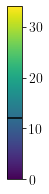

In [19]:
a = np.array([[0,1]])
plt.figure(figsize=(.25, 4))
img = plt.imshow(a, cmap="viridis",vmin=0,vmax=K_range[-1])
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.axhline(12,c='k')
plt.colorbar(cax=cax)
# plt.savefig("colorbar_Krange.pdf")

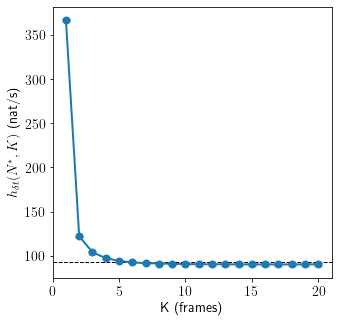

In [18]:
kn=13
Kmax=20
plt.figure(figsize=(5,5))
mean = np.mean(h_K_s[:Kmax,kn,:].T,axis=0)
cil = np.percentile(h_K_s[:Kmax,kn,:].T,2.5,axis=0)
ciu = np.percentile(h_K_s[:Kmax,kn,:].T,97.5,axis=0)
plt.errorbar(K_range[:Kmax],mean,yerr = [mean-cil,ciu-mean],capsize=4,marker='o',ms=7,lw=2)
plt.axhline(mean_source[kn],c='k',ls='--',lw=1)
plt.ylabel(r'$h_{\delta t}(N^*,K)$ (nat/s)')
plt.xlabel('K (frames)')
plt.xlim(0,21)
# plt.savefig('h_K_N_{}_Lorenz.pdf'.format(seed_range[kn]))
plt.show()

# bottom panel

In [16]:
f = h5py.File(dir_path+'Lorenz/example_P_sims/sims_K_1_N_3162.h5','r')
sims_K_1 = np.array(f['sims'])
twindow = np.array(f['MetaData/twindow'])
f.close()
f = h5py.File(dir_path+'Lorenz/example_P_sims/sims_K_12_N_3162.h5','r')
sims_K_12 = np.array(f['sims'])
f.close()

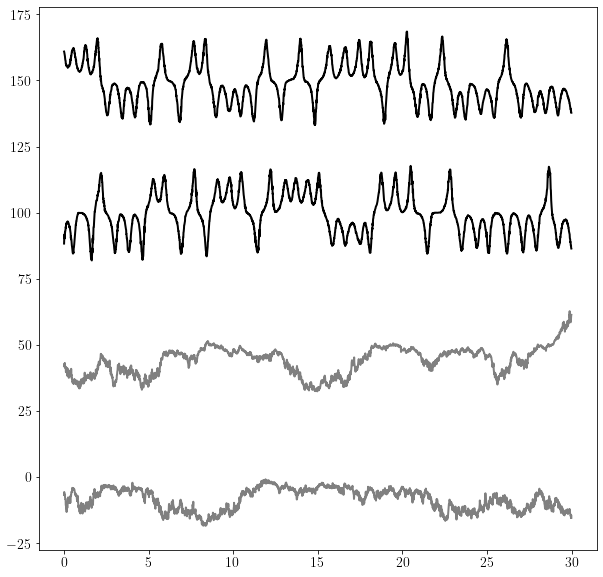

In [17]:
plt.figure(figsize=(10,10))
for k in range(2,4):
    plt.plot(np.arange(twindow)*dt,sims_K_12[k]+50*k,c='k',lw=2)
for k in range(0,2):
    plt.plot(np.arange(twindow)*dt,sims_K_1[k]+50*k,c='gray',lw=2)
# plt.xlim(0,500)
plt.show()

# FigS1b

In [22]:
ks=13
max_h_K_s = h_K_s[:25,ks,:]

In [23]:
diffs_h = (-np.diff(max_h_K_s,axis=0).T//(np.diff(K_range[:25]*dt))).T
cil_diff_h = np.percentile(diffs_h,2.5,axis=1)
ciu_diff_h = np.percentile(diffs_h,97.5,axis=1)
mean_diff_h = diffs_h.mean(axis=1)

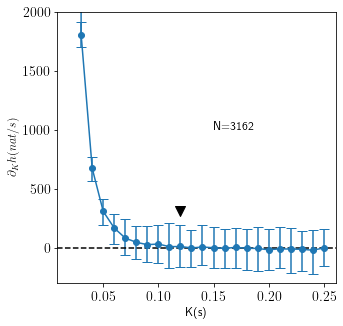

In [25]:
plt.figure(figsize=(5,5))
plt.errorbar(K_range[1:25]*dt,mean_diff_h,yerr = [mean_diff_h-cil_diff_h,ciu_diff_h-mean_diff_h],capsize=5,marker='o')
plt.scatter(K_range[11]*dt,2*ciu_diff_h[11],c='k',s=100,marker='v')
plt.axhline(0,ls='--',c='k')
plt.xlabel('K(s)',fontsize=12)
plt.ylabel('$\partial_K h (nat/s)$',fontsize=12)
plt.text(.15,1000,'N={}'.format(seed_range[ks]),fontsize=12)
plt.ylim(-300,2000)
# plt.savefig('h_diff_N_3162_zoom.pdf')
plt.show()